# Analisis de Datos Financieros con Yahoo Finanzas

## Preparacion de los datos

Importamos las librerias que utilizaremos

In [1]:
import pandas as pd
import yfinance as yf
#from yahoofinancials import YahooFinancials

Creamos una funcion generica que utilizaremos para descargar los datos de las distintas empresas

In [2]:
def df(name:str):
    return yf.download(name, 
                start="2014-01-01", 
                progress=False,
)

Importaremos los datos de Amazon, Netflix, IBM y SP500

In [3]:
df_amazon = df("AMZN")
df_netflix = df("NFLX")
df_ibm = df("IBM")
df_sp500 = df("SPY")

Solo utilizaremos las ultimas dos columnas (Precios de Cierre y Volúmenes)

In [4]:
df_amazon = df_amazon.iloc[:,[4,5]]
df_netflix = df_netflix.iloc[:,[4,5]]
df_ibm = df_ibm.iloc[:,[4,5]]
df_sp500 = df_sp500.iloc[:,[4,5]]

df_amazon

,Adj Close,Volume
Date,,
2014-01-02,19.898500,42756000
2014-01-03,19.822001,44204000
2014-01-06,19.681499,63412000
2014-01-07,19.901501,38320000
2014-01-08,20.096001,46330000
...,...,...
2023-04-26,104.980003,73803800
2023-04-27,109.820000,149961200
2023-04-28,105.449997,130565000


Unimos las 4 empresas en un solo dataset y renombramos las columnas

In [5]:
columns = []
for x in ["AMZN ", "NFLX ", "IBM ", "SPY "]:
    for y in range(2):
        columns.append(x+df_amazon.columns[y])
datas = [df_amazon["Adj Close"],df_amazon["Volume"],df_netflix["Adj Close"],df_netflix["Volume"],df_ibm["Adj Close"],df_ibm["Volume"],df_sp500["Adj Close"],df_sp500["Volume"]]
df_yahoo = pd.DataFrame()
for i in range(len(columns)):
    df_yahoo[columns[i]] = datas[i]

Comprobamos el nuevo DataFrame y lo guardamos para no tener que descargar los datos nuevamente

In [6]:
print(df_yahoo)

import csv

df_yahoo.to_csv('df_yahoo.csv', sep=",")

            AMZN Adj Close  AMZN Volume  NFLX Adj Close  NFLX Volume   
Date                                                                   
2014-01-02       19.898500     42756000       51.831429     12325600  \
2014-01-03       19.822001     44204000       51.871429     10817100   
2014-01-06       19.681499     63412000       51.367142     15501500   
2014-01-07       19.901501     38320000       48.500000     36167600   
2014-01-08       20.096001     46330000       48.712856     20001100   
...                    ...          ...             ...          ...   
2023-04-26      104.980003     73803800      321.149994      4623200   
2023-04-27      109.820000    149961200      325.850006      5618800   
2023-04-28      105.449997    130565000      329.929993      4221900   
2023-05-01      102.050003     74728100      324.119995      5341500   
2023-05-02      103.629997     72321082      317.549988      4200072   

            IBM Adj Close  IBM Volume  SPY Adj Close  SPY Volum

Graficamos la serie de tiempo de los precios, pero primero importamos y ajustamos los parametros del modulo

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

In [8]:
def serie_temporal():
    # Crear una figura y un conjunto de ejes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficar las dos variables simultáneas
    ax.plot(df_yahoo.index, df_yahoo["AMZN Adj Close"], label='Amazon')
    ax.plot(df_yahoo.index, df_yahoo["NFLX Adj Close"], label='Netflix')
    ax.plot(df_yahoo.index, df_yahoo["IBM Adj Close"], label='IBM')
    ax.plot(df_yahoo.index, df_yahoo["SPY Adj Close"], label='Standar&Poors')

    # Agregar etiquetas de los ejes y el título
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Valor')
    ax.set_title('Evolucion del precio')

    # Agregar una leyenda
    ax.legend()

    # Mostrar el gráfico
    plt.show()


Ahora si generamos el grafico

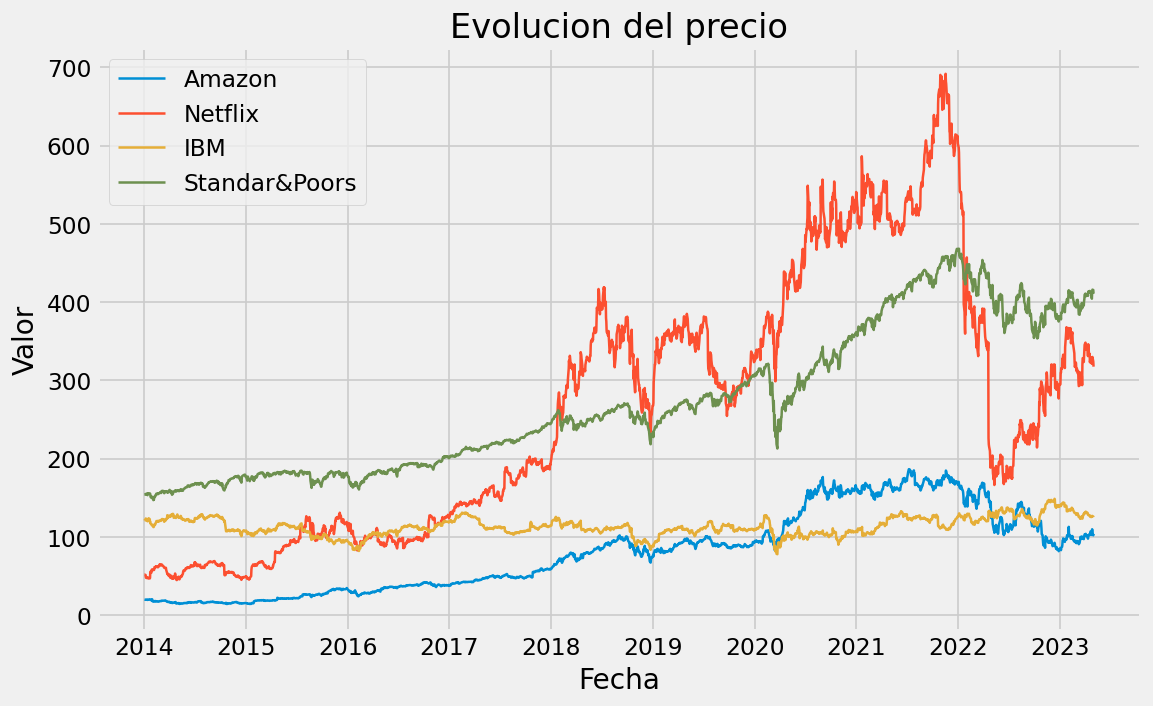

In [9]:
serie_temporal()

### Conclusiones del grafico:
* Ibm posee un valor estable durante todo el periodo
* S&P es quien presenta un crecimiento sostenido y estable
* Netflix crecio de manera descomumal durante la pandemia, pero cayo abruptamente una ves superada, aunque muestra una acentuada recuperacion

Generamos ahora un Grafico de Volumenes y Precios

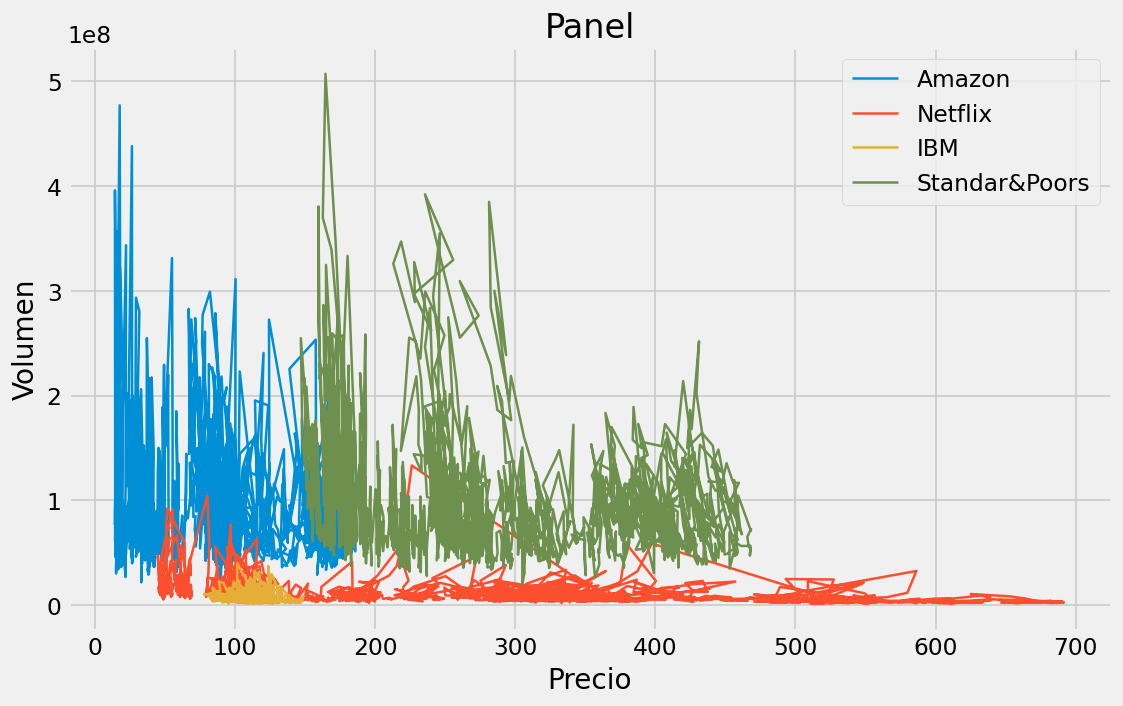

In [12]:
def panel():
    # Crear una figura y un conjunto de ejes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficar las dos variables simultáneas
    ax.plot(df_yahoo["AMZN Adj Close"], df_yahoo["AMZN Volume"], label='Amazon')
    ax.plot(df_yahoo["NFLX Adj Close"], df_yahoo["NFLX Volume"], label='Netflix')
    ax.plot(df_yahoo["IBM Adj Close"], df_yahoo["IBM Volume"], label='IBM')
    ax.plot(df_yahoo["SPY Adj Close"], df_yahoo["SPY Volume"], label='Standar&Poors')

    # Agregar etiquetas de los ejes y el título
    ax.set_xlabel('Precio')
    ax.set_ylabel('Volumen')
    ax.set_title('Panel')

    # Agregar una leyenda
    ax.legend()

    # Mostrar el gráfico
    plt.show()

panel()


### Conclusiones del grafico:
* Netflix es quien presenta un mayor rango de valor pero con un volumen por debajo de la base tanto de S&P como de Amazon
* S&P presenta mayor amplitud de valor que Amazon pero son bastante similares en cuanto a volumenes transados